# 0 - Review part

**Steps** :</br> 
    1 - [load, plot and play the audio of the signal](#first) </br> 
    2 - [Fourier Transform and Inverse Fourier Transform](#second) </br> 
    3 - [Down sampling, and Up sampling](#third) </br> 


### 1 - load, plot and play the audio of the signal
<a id='first'></a>

load the signal, plot it and play the audio

In [1]:
import scipy.io.wavfile as wavfile
import matplotlib.pyplot  as plt
import numpy as np

In [2]:
samle_rate , signal = wavfile.read('daneshgah.wav')
signal = signal.T[0]

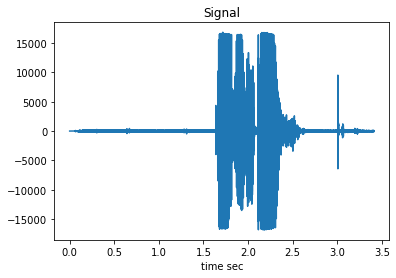

In [3]:
plt.plot(np.linspace(0,float(len(signal)/samle_rate),len(signal)),signal)
plt.xlabel('time sec')
plt.title('Signal')
plt.show()

In [4]:
from IPython.display import Audio

In [5]:
Audio(signal,rate=samle_rate)

### 2 - [Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform) and [Inverse Fourier Transform](https://en.wikipedia.org/wiki/Fourier_inversion_theorem)
<a id='second'></a>

Find the Fourier Transfer of the signal <br>
because of time complexity, do it for signal[70000:90000]

we know that:</br>
$\;\;\;\;\;\; X_k =  \sum_{<N>}x[n]e^{-jk\frac{2\pi}{N}n} $

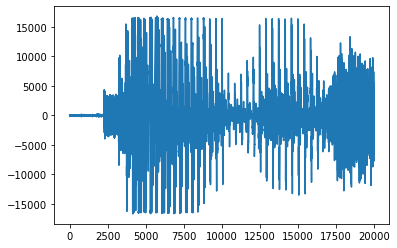

In [6]:
sub_sig = signal[70000:90000]
plt.plot(sub_sig)
Audio(sub_sig,rate=samle_rate)

In [7]:
def FT(x):
    N = len(x)
    n = np.arange(N)
    X_k = []
    for k in range(N):
        e = np.exp(-1j * k * 2* np.pi * n /N)
        X_k.append(np.dot(e,x))
        
    return np.array(X_k)

In [8]:
ft = FT(sub_sig)

In [9]:
np_ft = np.fft.fft(sub_sig)

In [10]:
np.allclose(ft,np_ft)

True

In [11]:
import datetime

n = 1000
time_ft = []
time_np_ft = []

for i in range(1,n):
    a = datetime.datetime.now()
    FT(sub_sig[:i])
    b = datetime.datetime.now()
    np.fft.fft(sub_sig[:i])
    c = datetime.datetime.now()
    
    time_ft.append((b-a).total_seconds())
    time_np_ft.append((c-b).total_seconds())

Text(0.5, 0, 'np FT time')

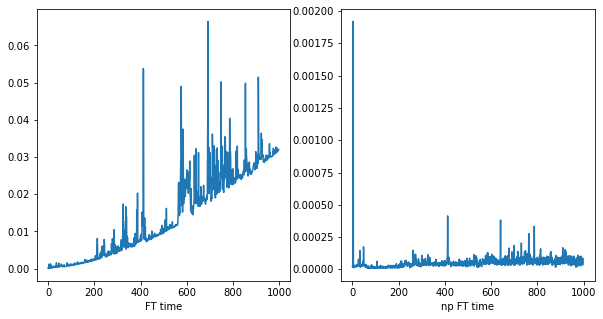

In [12]:
fig , ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(time_ft)
ax[0].set_xlabel('FT time')
ax[1].plot(time_np_ft) 
ax[1].set_xlabel('np FT time')

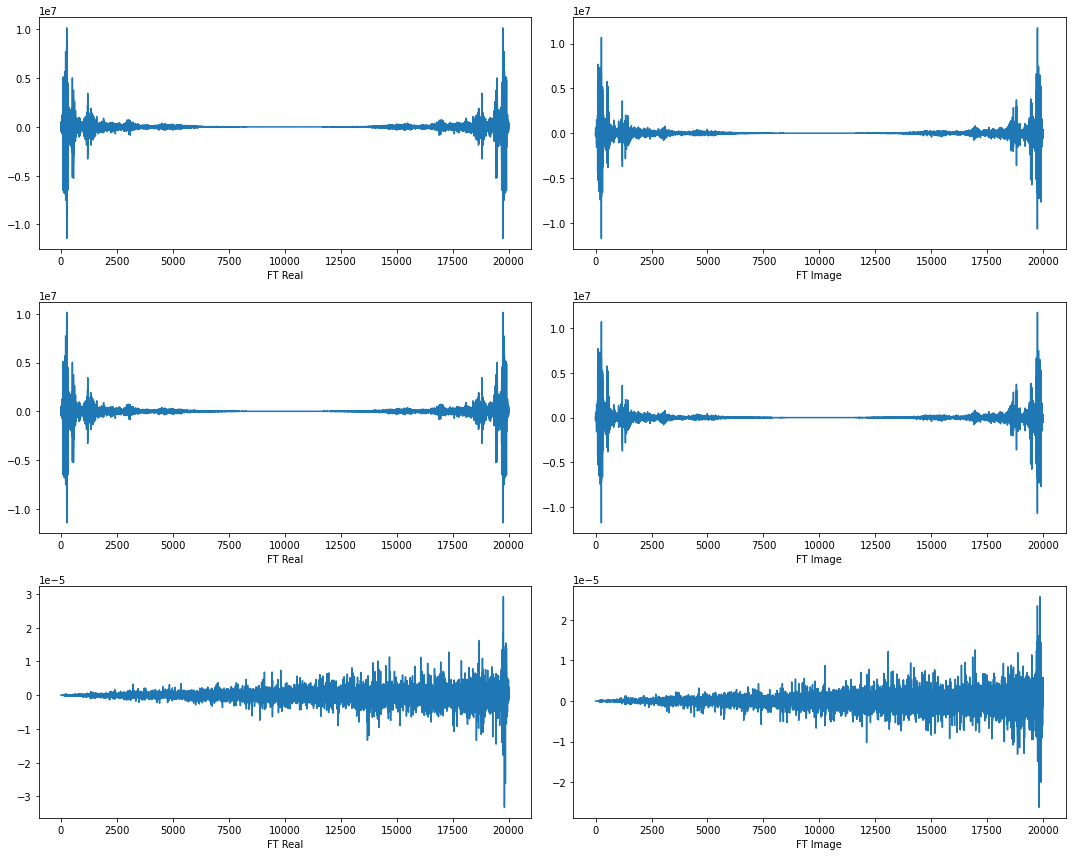

In [13]:
fig , ax = plt.subplots(3,2,figsize=(15,12))
ax[0][0].plot(np.real(ft))
ax[0][1].plot(np.imag(ft))
ax[0][0].set_xlabel('FT Real')
ax[0][1].set_xlabel('FT Image')

ax[1][0].plot(np.real(np_ft))
ax[1][1].plot(np.imag(np_ft))
ax[1][0].set_xlabel('FT Real')
ax[1][1].set_xlabel('FT Image')

ax[2][0].plot(np.real(ft)-np.real(np_ft))
ax[2][1].plot(np.imag(ft)-np.imag(np_ft))
ax[2][0].set_xlabel('FT Real')
ax[2][1].set_xlabel('FT Image')

plt.tight_layout()
plt.show()

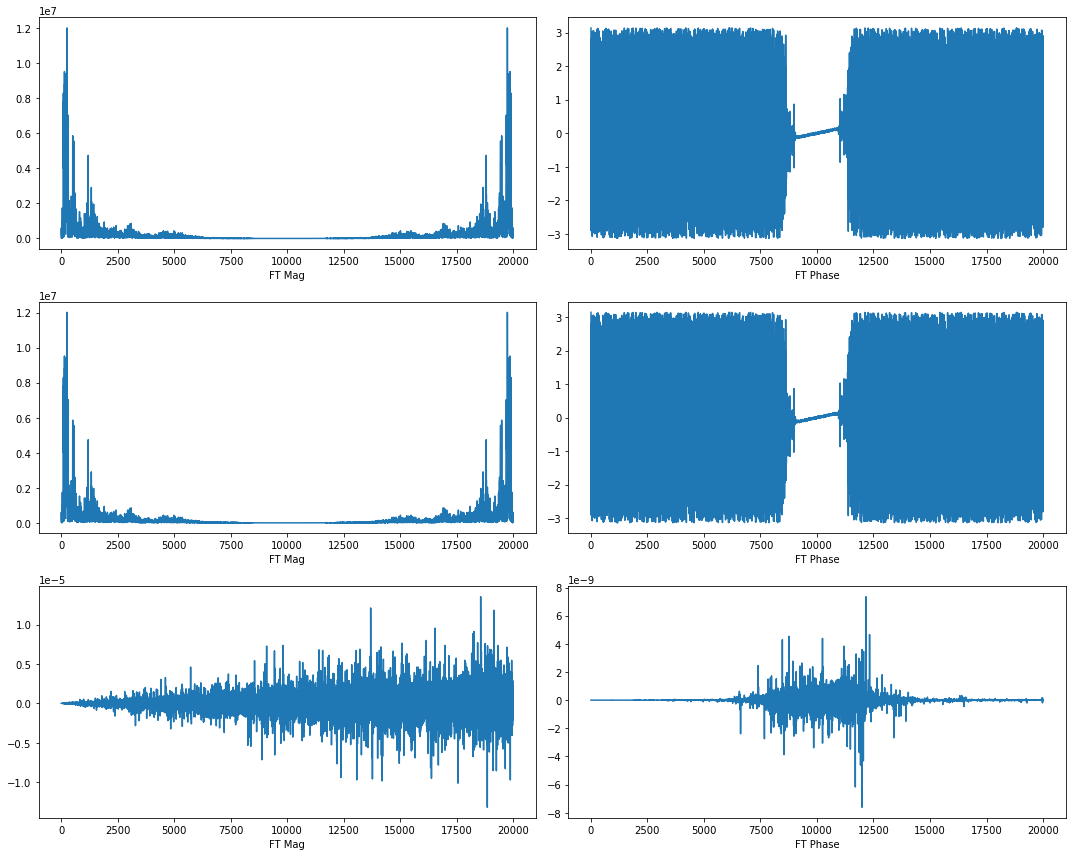

In [14]:
fig , ax = plt.subplots(3,2,figsize=(15,12))
ax[0][0].plot(np.abs(ft))
ax[0][1].plot(np.angle(ft))
ax[0][0].set_xlabel('FT Mag')
ax[0][1].set_xlabel('FT Phase')

ax[1][0].plot(np.abs(np_ft))
ax[1][1].plot(np.angle(np_ft))
ax[1][0].set_xlabel('FT Mag')
ax[1][1].set_xlabel('FT Phase')

ax[2][0].plot(np.abs(ft)-np.abs(np_ft))
ax[2][1].plot(np.angle(ft)-np.angle(np_ft))
ax[2][0].set_xlabel('FT Mag')
ax[2][1].set_xlabel('FT Phase')

plt.tight_layout()
plt.show()

Find the Inverse Fourier Transfer of the Fourier Transform <br>

we know that:</br>
$\;\;\;\;\;\; x[n] = x[n+N] = \frac{1}{N} \sum_{k=0}^{N-1}X_ke^{jk\frac{2\pi}{N}n} $

In [15]:
def I_FT(X_w):
    N = len(X_w)
    k = np.arange(N)
    x_n = []
    for n in range(N):
        e = np.exp(1j * k * 2 * np.pi * n / N)
        x_n.append(np.dot(e,X_w))
        
    return np.array(x_n)/N

In [16]:
i_ft = I_FT(ft)

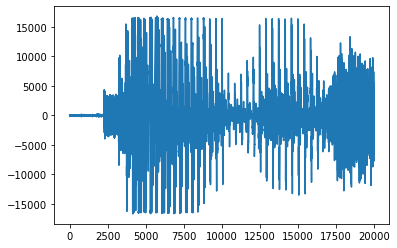

In [17]:
plt.plot(np.real(i_ft))
Audio(np.real(i_ft),rate=samle_rate)

### 3 - [Down sampling](https://en.wikipedia.org/wiki/Downsampling_(signal_processing)), and [Up sampling](https://en.wikipedia.org/wiki/Upsampling)
<a id='third'></a>

up sample the signal, L=2
then plot it and play Audio <br>
about converting filters boundaries from radian domain($~0~to~ 2\pi~$) to frequency domain($~0~to~f_s~$) we know that:<br>
$ \frac{\frac{f_s}{2}}{L} = \frac{\pi}{L}$

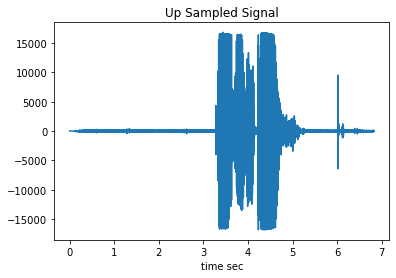

In [18]:
L = 2
up_sig = np.zeros((len(signal)*L))
up_sig[::L] = signal
plt.plot(np.linspace(0,float(len(up_sig)/samle_rate),len(up_sig)),up_sig)
plt.title('Up Sampled Signal')
plt.xlabel('time sec')
Audio(up_sig,rate = samle_rate)

In [19]:
up_ft = np.fft.fft(up_sig)

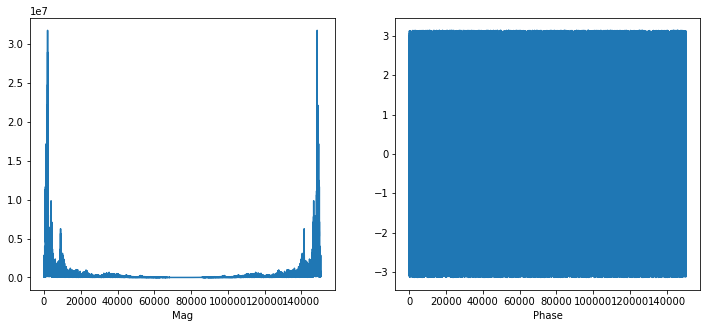

In [20]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(np.abs(np.fft.fft(signal)))
ax[0].set_xlabel('Mag')
ax[1].plot(np.angle(np.fft.fft(signal)))
ax[1].set_xlabel('Phase')

plt.show()

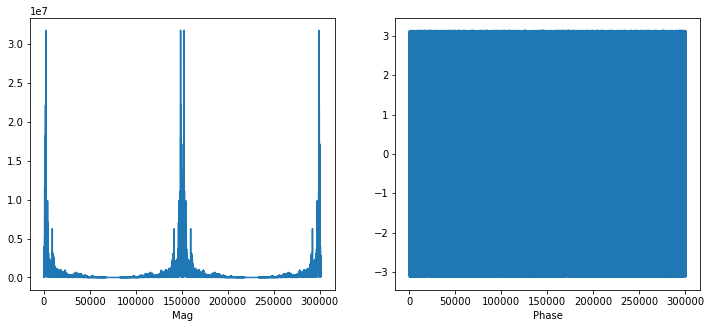

In [21]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(np.abs(up_ft))
ax[0].set_xlabel('Mag')
ax[1].plot(np.angle(up_ft))
ax[1].set_xlabel('Phase')

plt.show()

Apply low pass filter in frequency domain

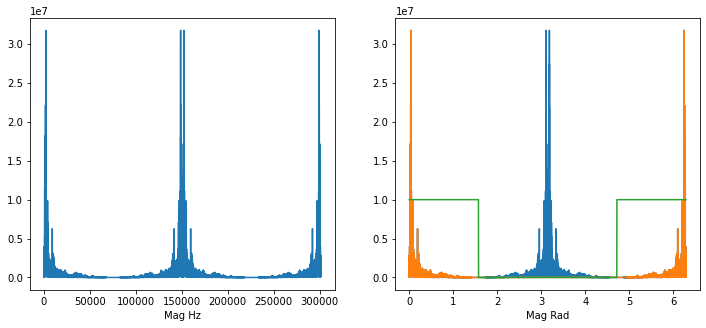

In [22]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(np.abs(up_ft))
ax[0].set_xlabel('Mag Hz')

up_f = np.zeros((len(up_ft)))
w_c = int(len(up_ft)/(2*L))
up_f[:w_c] = 1
up_f[-w_c:] = 1
ax[1].plot(np.linspace(0,2*np.pi,len(up_ft)),np.abs(up_ft))
ax[1].plot(np.linspace(0,2*np.pi,len(up_ft)),up_f*np.abs(up_ft))
ax[1].plot(np.linspace(0,2*np.pi,len(up_ft)),up_f*10000000)

ax[1].set_xlabel('Mag Rad')

plt.show()

dawn sample the signal, M=2
then plot it and play Audio<br>
about converting filters boundaries from radian domain($~0~to~ 2\pi~$) to frequency domain($~0~to~f_s~$) we know that:<br>
$ \frac{\frac{f_s}{2}}{M} = \frac{\pi}{M}$

In [23]:
down_ft = np.fft.fft(signal)

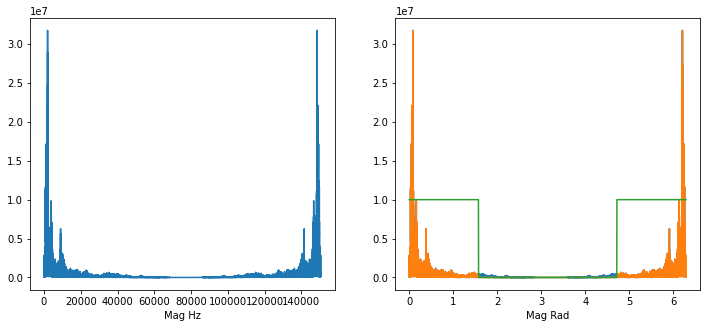

In [24]:
M=2
fig , ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(np.abs(down_ft))
ax[0].set_xlabel('Mag Hz')

down_f = np.zeros((len(down_ft)))
w_c = int(len(down_ft)/(2*M))
down_f[:w_c] = 1
down_f[-w_c:] = 1
ax[1].plot(np.linspace(0,2*np.pi,len(down_ft)),np.abs(down_ft))
ax[1].plot(np.linspace(0,2*np.pi,len(down_ft)),down_f*np.abs(down_ft))
ax[1].plot(np.linspace(0,2*np.pi,len(down_ft)),down_f*10000000)

ax[1].set_xlabel('Mag Rad')

plt.show()

In [25]:
new_ft = down_f * down_ft

In [26]:
i_down_sig = np.fft.ifft(new_ft)

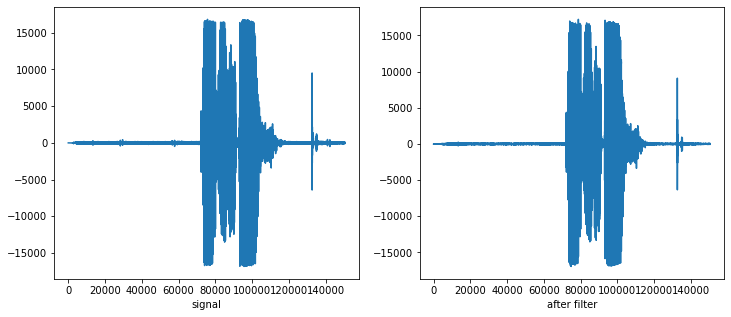

In [27]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(signal)
ax[0].set_xlabel('signal')

ax[1].plot(np.real(i_down_sig))
ax[1].set_xlabel('after filter')

plt.show()
Audio(np.real(i_down_sig),rate=samle_rate)

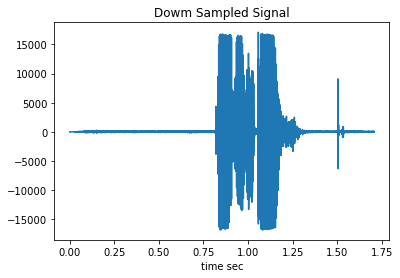

In [28]:
down_sig = np.zeros((int(len(i_down_sig)/M)))
down_sig = np.real(i_down_sig)[::M]
plt.plot(np.linspace(0,float(len(down_sig)/samle_rate),len(down_sig)),down_sig)
plt.title('Dowm Sampled Signal')
plt.xlabel('time sec')
Audio(down_sig,rate = samle_rate)